In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [73]:
df = pd.read_excel("/content/gdrive/MyDrive/data/vickers_hardness_dataset.xlsx")
df.head()

,Type_of_samples,P,D1,D2,HV
0,0,500,61.606,63.455,226.406
1,0,500,62.380,61.992,249.658
2,0,500,59.052,62.373,244.361
3,0,500,60.825,62.618,243.444
4,0,500,60.368,62.374,231.127


In [74]:
df.describe()

,Type_of_samples,P,D1,D2,HV
count,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.000000,320.000000,46.014587,45.994812,274.718868
std,0.817041,160.106773,14.088705,14.117520,63.642977
min,0.000000,100.000000,15.658000,17.777000,131.551000
25%,0.000000,200.000000,34.489000,34.883250,229.161250
50%,1.000000,300.000000,48.276500,48.346000,265.860500
75%,2.000000,500.000000,57.872750,57.512500,316.910250
max,2.000000,500.000000,75.205000,76.127000,581.744000


In [75]:
columns = ['Type_of_samples', 'P', 'D1', 'D2']

In [76]:
df.isnull().sum()

Type_of_samples    0
P                  0
D1                 0
D2                 0
HV                 0
dtype: int64

In [77]:
df['HV'].value_counts()

271.584    5
278.914    4
380.861    4
228.887    4
353.125    3
          ..
202.600    1
241.111    1
208.088    1
254.022    1
250.292    1
Name: HV, Length: 607, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

dfX = df.drop(['HV'],axis=1)
dfY = df['HV']

<ipython-input-79-ebe6c7a81e38>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label='Original', s=20)


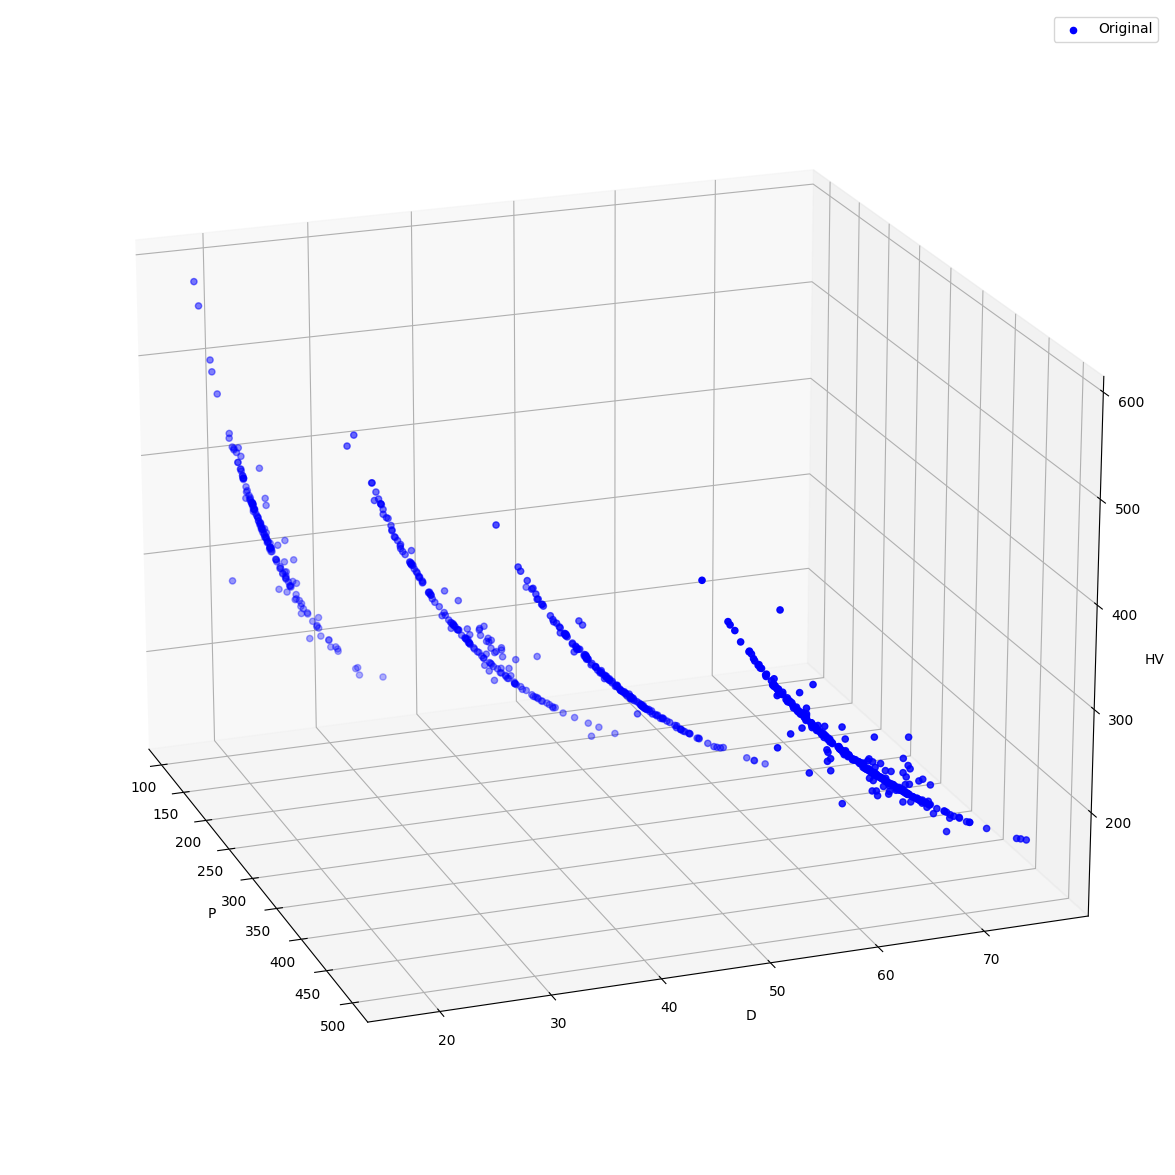

In [79]:
original = dfY.to_numpy()
x = dfX['P'].to_numpy()
y = (dfX['D1'].to_numpy() + dfX['D2'].to_numpy()) / 2

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(azim=340, elev=20)
sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label='Original', s=20)
ax.set_xlabel('P')
ax.set_ylabel('D')
ax.set_zlabel('HV')
ax.legend(handles=[sc1], loc='best')
plt.show()

<ipython-input-83-efd8ae7208e8>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label=sample_name, s=20)


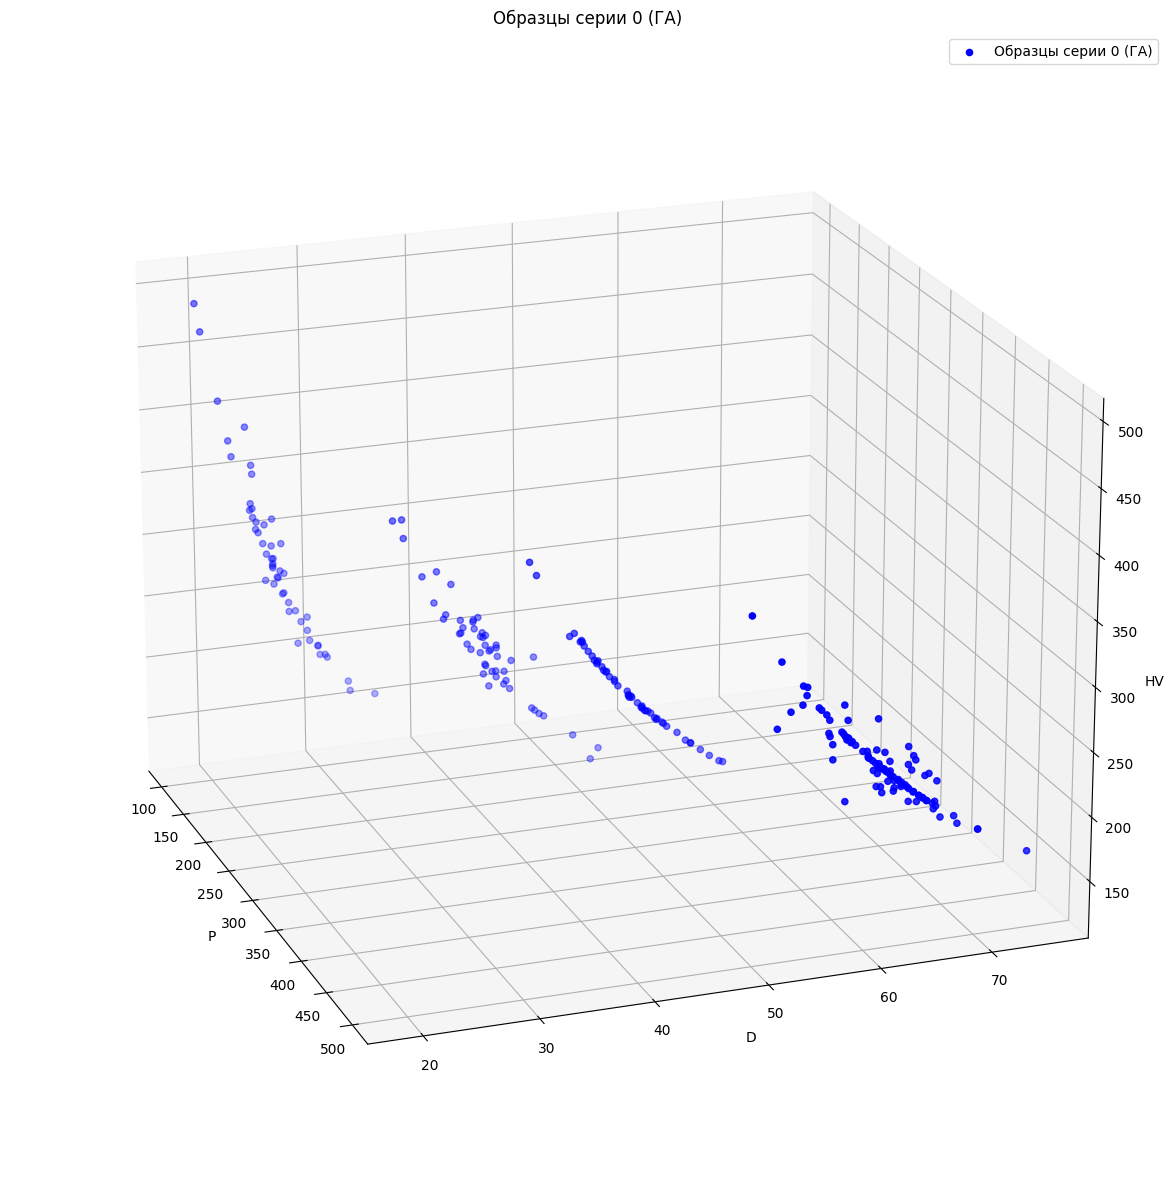

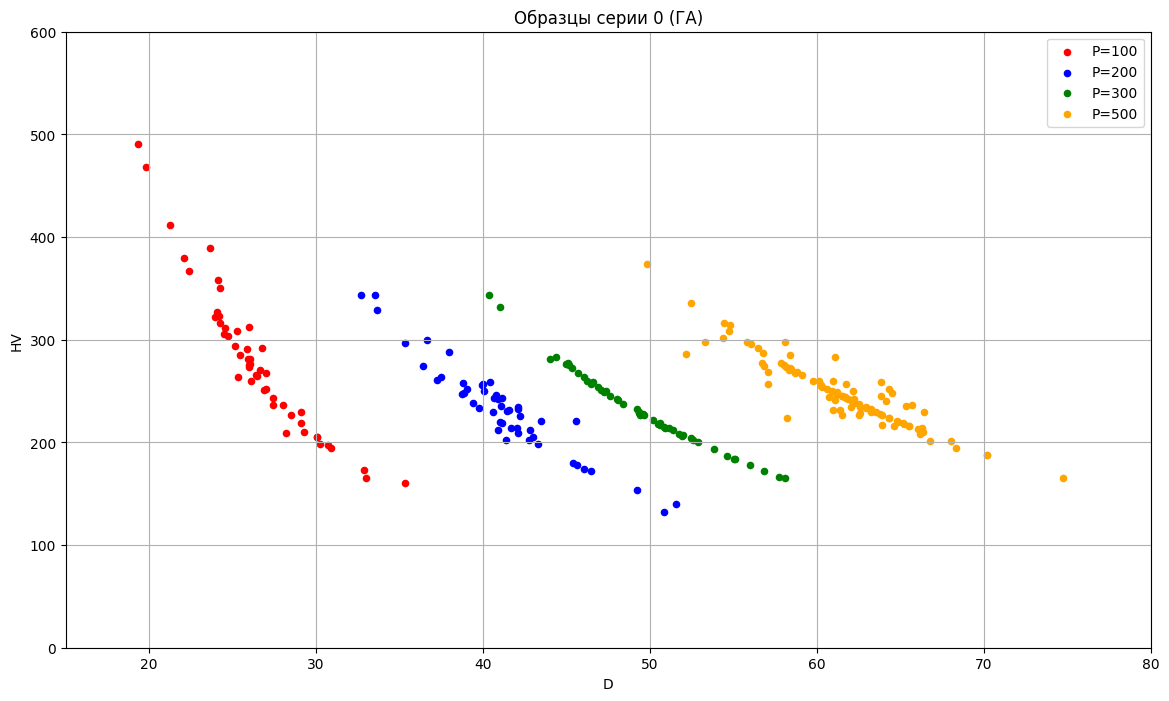

In [83]:
import matplotlib.pyplot as plt

def plot_samples(X, Y, type_of_samples, sample_name):
    mask = X['Type_of_samples'] == type_of_samples
    original = Y[mask].to_numpy()
    x = X[mask]['P'].to_numpy()
    y = (X[mask]['D1'].to_numpy() + X[mask]['D2'].to_numpy()) / 2

    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=340, elev=20)
    sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label=sample_name, s=20)
    ax.set_xlabel('P')
    ax.set_ylabel('D')
    ax.set_zlabel('HV')
    ax.legend(handles=[sc1], loc='best')
    plt.title(sample_name)
    plt.show()

    original = Y[mask].to_numpy()
    x = (X[mask]['D1'].to_numpy() + X[mask]['D2'].to_numpy()) / 2
    p_values = X[mask]['P']

    fig = plt.figure(figsize=(14, 8))
    plt.xlim(15, 80)  # Ограничение значений по оси D
    plt.ylim(0, 600)  # Ограничение значений по оси HV
    plt.grid(True)  # Добавление сетки

    colors = ['red', 'blue', 'green', 'orange']  # Задание цветов для каждой группы значений P
    for p_value, color in zip([100, 200, 300, 500], colors):
        p_mask = p_values == p_value
        plt.scatter(x[p_mask], original[p_mask], c=color, label=f'P={p_value}', s=20)

    plt.xlabel('D')
    plt.ylabel('HV')
    plt.title(sample_name)
    plt.legend()
    plt.show()

# Пример использования функции
plot_samples(dfX, dfY, 0, 'Образцы серии 0 (ГА)')


<ipython-input-83-efd8ae7208e8>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label=sample_name, s=20)


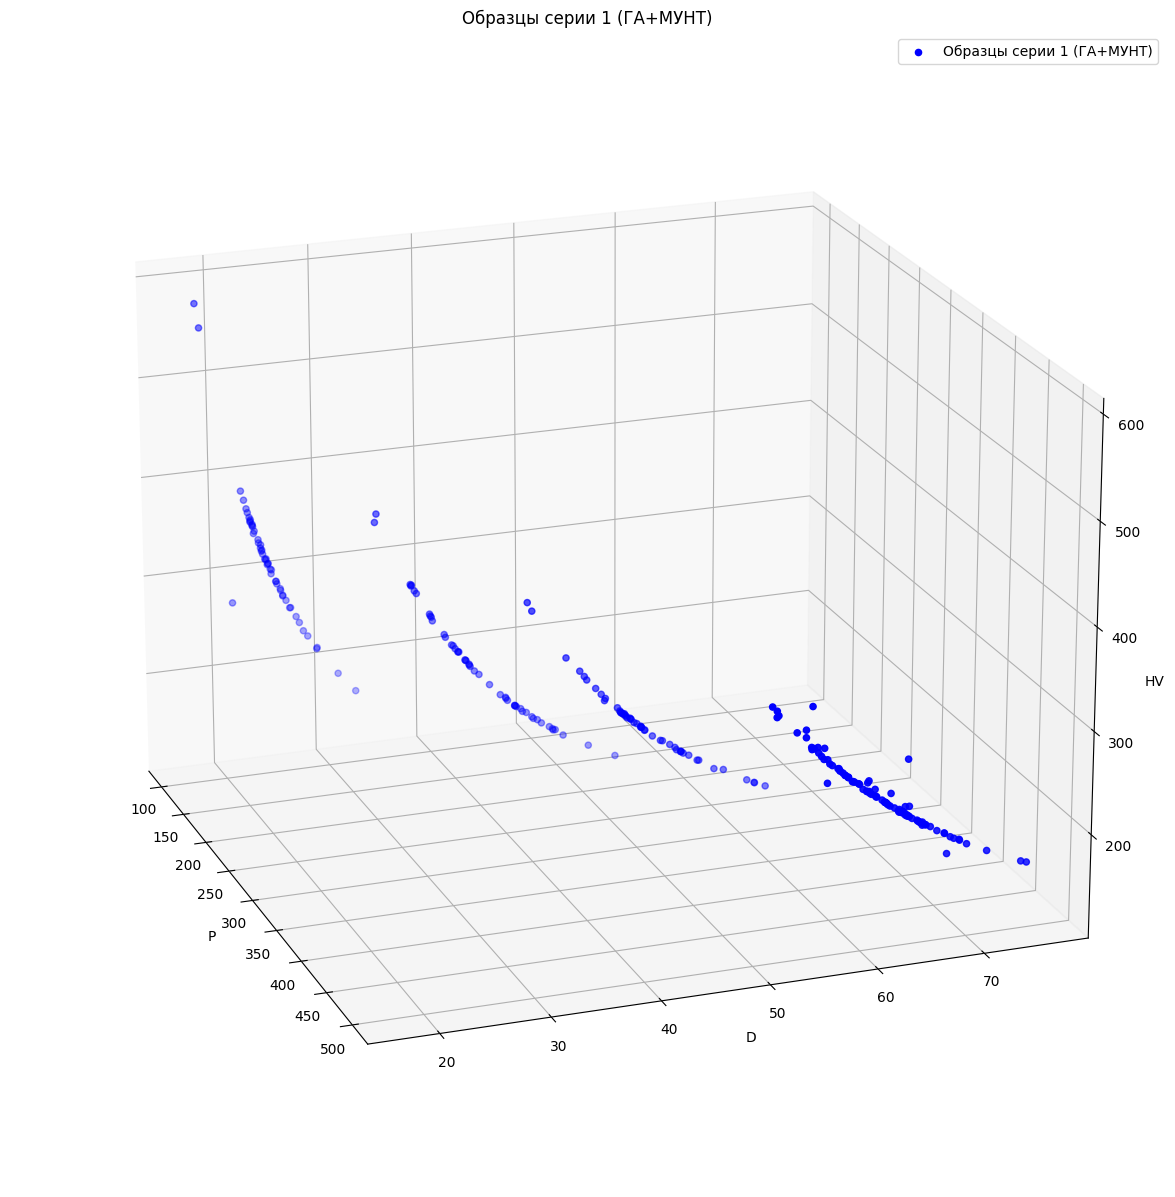

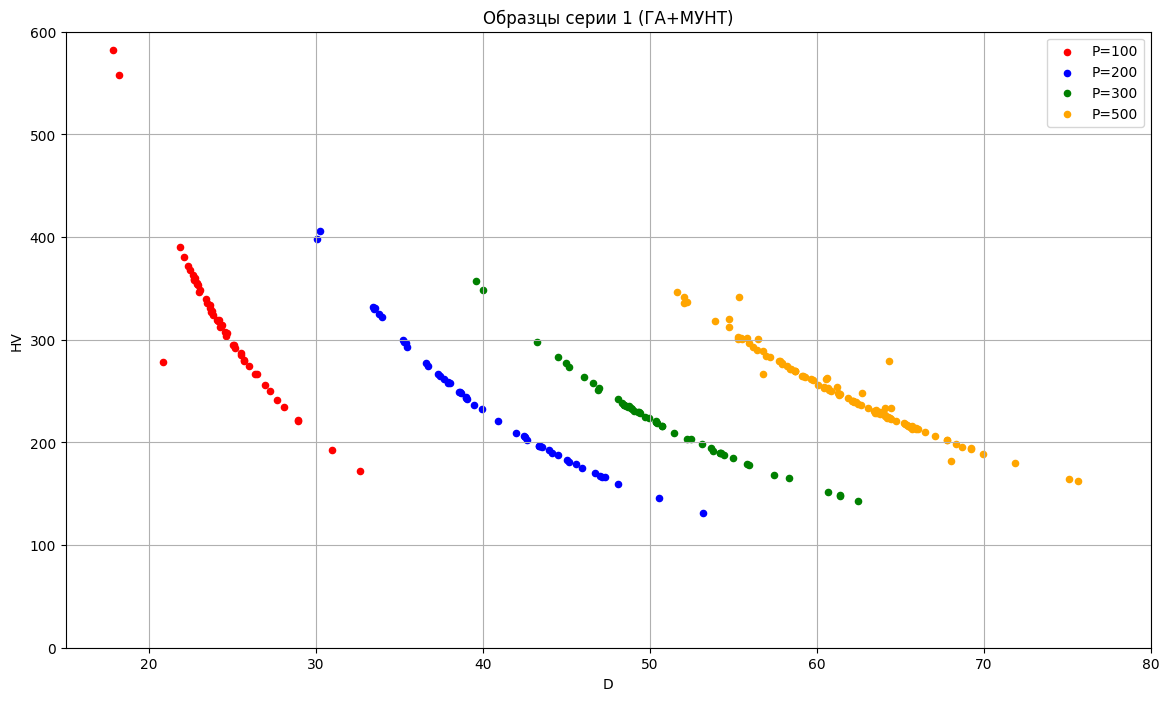

In [85]:
plot_samples(dfX, dfY, 1, 'Образцы серии 1 (ГА+МУНТ)')

<ipython-input-83-efd8ae7208e8>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc1 = ax.scatter(x, y, original, c='b', cmap='coolwarm', label=sample_name, s=20)


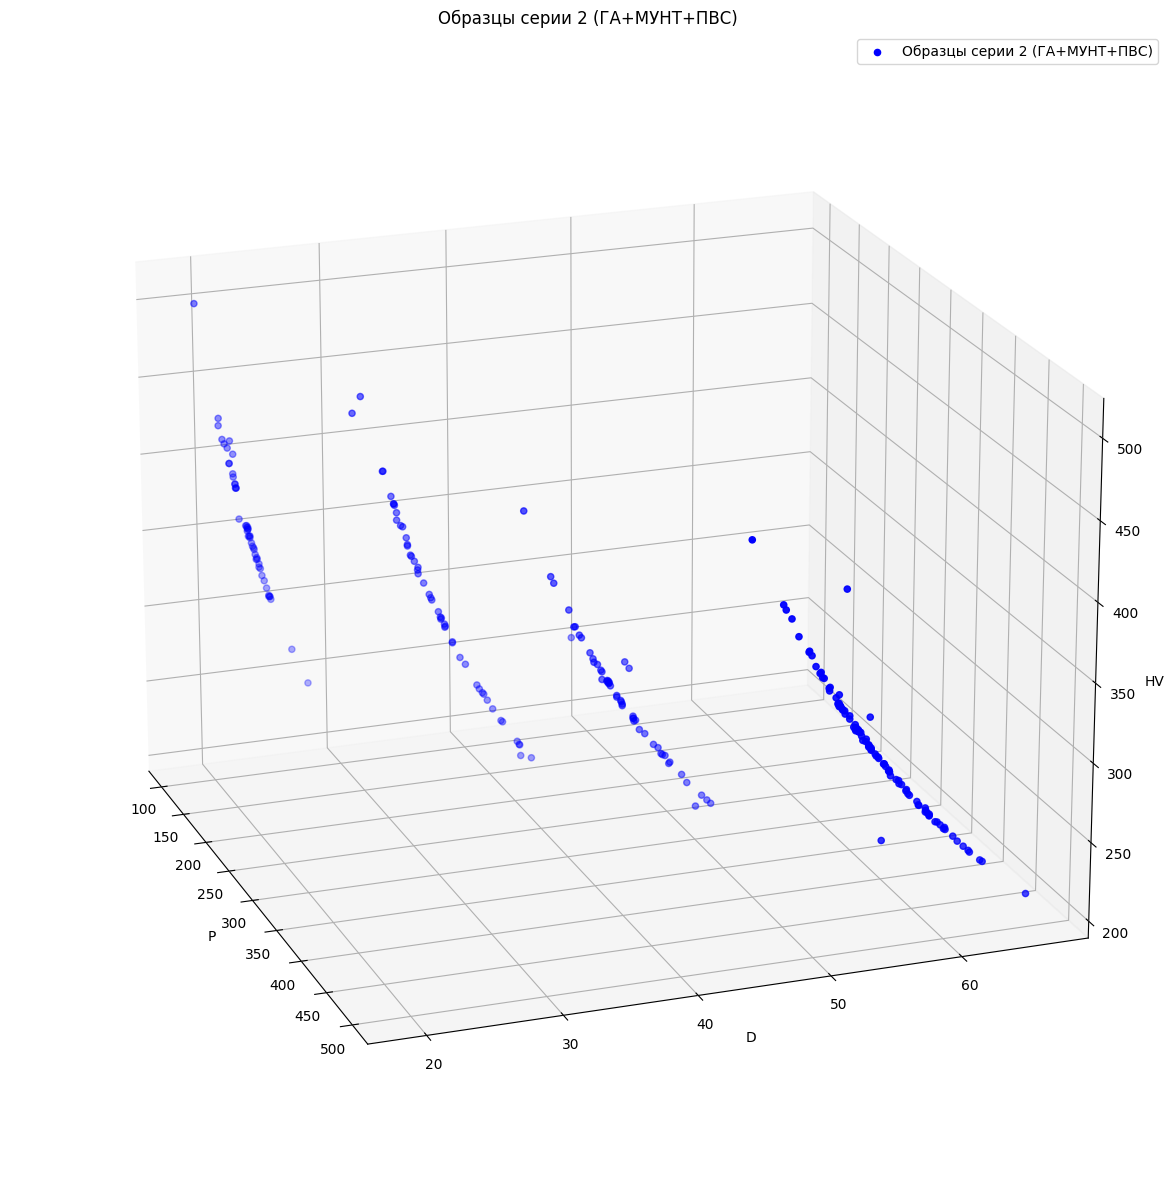

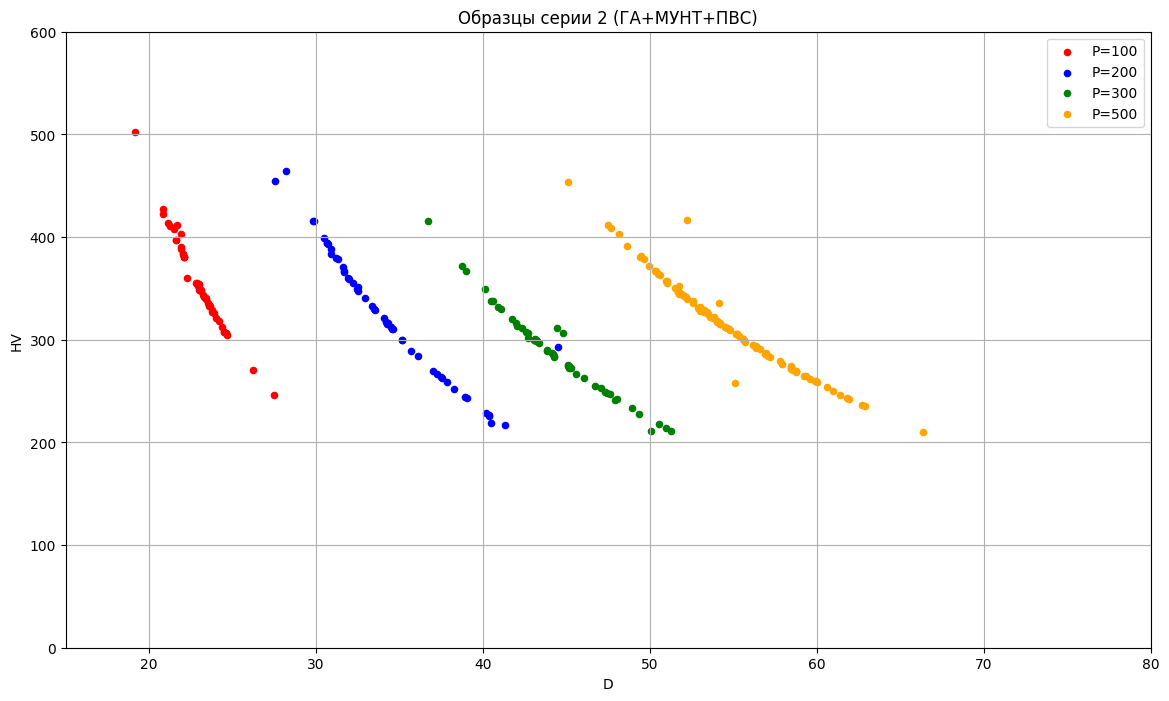

In [84]:
plot_samples(dfX, dfY, 2, 'Образцы серии 2 (ГА+МУНТ+ПВС)')